--- Linear Regression Performance ---
MSE: 0.2448
RMSE: 0.4948
R² Score: 0.9833



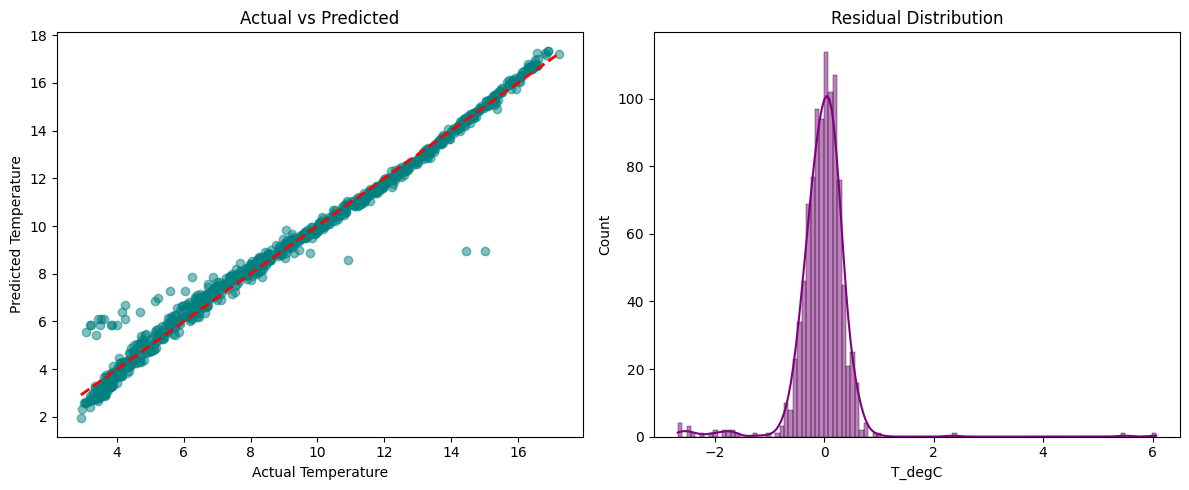

--- Ridge Regression (Regularized) ---
Ridge R² Score: 0.9832


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

df = pd.read_csv('bottle.csv', low_memory=False)

cols = ['T_degC', 'Depthm', 'Salnty', 'STheta', 'O2Sat']
df_subset = df[cols]


df_subset = df_subset.dropna(subset=['T_degC'])
df_subset = df_subset.fillna(df_subset.median())


df_final = df_subset.iloc[:5000, :]

X = df_final.drop('T_degC', axis=1)
y = df_final['T_degC']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_pred = lr_model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"--- Linear Regression Performance ---")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}\n")

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.5, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Temperature')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted')

# Residual Plot
plt.subplot(1, 2, 2)
residuals = y_test - y_pred
sns.histplot(residuals, kde=True, color='purple')
plt.title('Residual Distribution')
plt.tight_layout()
plt.show()

# 8. Optimization (Regularization)
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)

print(f"--- Ridge Regression (Regularized) ---")
print(f"Ridge R² Score: {r2_score(y_test, ridge_pred):.4f}")